In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import random
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm
import pickle

from canvas import *
from placer import *

## Pseudo Testcase Generation

[INFO] Box box_0 created
[INFO] Box box_1 created
[INFO] Box box_2 created
[INFO] Box box_3 created
[INFO] Box box_4 created
[INFO] Box box_5 created
[INFO] Box box_6 created
[INFO] Box box_7 created
[INFO] Box box_8 created
[INFO] Box box_9 created
number of boxes: 10
number of nets: 3


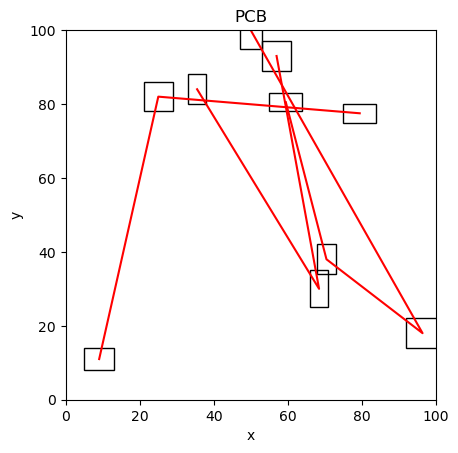

In [2]:
# make some boxes and nets
box_collection = {}
net_collection = {}

# generate 10 boxes and 3 nets
for i in range(10):
    net_idx = int(i % 3)
    box_collection[f"box_{i}"] = Box(
        box_name=f"box_{i}",
        llx=random.randint(5, 95),
        lly=random.randint(5, 95),
        width=random.randint(5, 10),
        height=random.randint(5, 10),
        net_name=f"net_{net_idx}",
    )

    if f"net_{net_idx}" not in net_collection:
        net_collection[f"net_{net_idx}"] = Net(
            net_name=f"net_{net_idx}", source_box_name=f"box_{i}", sink_box_names=[]
        )
    else:
        net_collection[f"net_{net_idx}"].add_sink_box_name(f"box_{i}")

# make a canvas
pcb_canvas = PCBCanvas(width=100, height=100, boxes=box_collection, nets=net_collection)
print("number of boxes:", len(pcb_canvas.boxes))
print("number of nets:", len(pcb_canvas.nets))
pcb_canvas.plot()

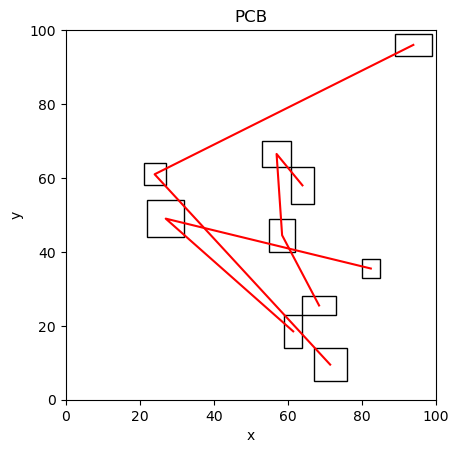

wirelength:	 337.5714307701353


In [3]:
# pickle the canvas
pickle_id = '05'
# with open(f"./testcase/pcb_canvas_{pickle_id}.pkl", "wb") as f:
#     pickle.dump(pcb_canvas, f)
# load the canvas
with open(f"./testcase/pcb_canvas_{pickle_id}.pkl", "rb") as f:
    pcb_canvas = pickle.load(f)

pcb_canvas.plot()
print("wirelength:\t", pcb_canvas.get_total_wirelength_from_cxy())

In [4]:
# everything 0
dx_list = [0.0] * 10
dy_list = [0.0] * 10
dx_list = [-0.232823, 0.491275, 0.356292, 0.847550, -0.924190, 0.989562, 0.161006, 0.864985, 0.862639, 0.860507]
dy_list = [0.317008, 0.374289, 0.440887, -0.104168, -0.934618, 0.223912, 0.223558, 0.476076, -0.014023, 0.021435]
pcb_canvas.set_all_boxes_motion(dx_list, dy_list)
print("are all boxes in canvas?", pcb_canvas.if_all_boxes_within_boundary())
plot_id = 'plot02'
for i in range(500):
    # print("iteration:", i)
    pcb_canvas.move_all_boxes()
    pcb_canvas.plot(savefig=True, filename=f"./plot/{plot_id}/placement_%d.png" % i)
    # print("\twirelength:\t", pcb_canvas.get_total_wirelength_from_cxy())

pcb_canvas.generate_gif_from_plots(plot_id, "./placement.gif")


are all boxes in canvas? True


In [5]:
pcb_canvas.get_total_wirelength_from_cxy()

70.00000000000028